**Import libaries**
Author: <Zongrong Li 3707497945 DSCI 510>

In [1]:
import seaborn as sns
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

**Load Integrated Data**

In [2]:
# Load the data
file_path = '../data/processed/integrated_data.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataframe
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   latitude              3289 non-null   float64
 1   longitude             3289 non-null   float64
 2   Review_num            3289 non-null   int64  
 3   Rating                3289 non-null   int64  
 4   Categories            3289 non-null   object 
 5   Price                 2405 non-null   float64
 6   ADI_NATRANK           3179 non-null   float64
 7   ADI_NATRANK_Category  3179 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 205.7+ KB


(None,
     latitude   longitude  Review_num  Rating  \
 0  34.070152 -118.307633           1       2   
 1  34.070152 -118.307633           1       2   
 2  34.070152 -118.307633           1       2   
 3  34.070152 -118.307633           1       2   
 4  34.099061 -118.337309           2       2   
 
                            Categories  Price  ADI_NATRANK  \
 0    Korean, Bars, Tapas/Small Plates    NaN          1.0   
 1    Korean, Bars, Tapas/Small Plates    NaN          1.0   
 2    Korean, Bars, Tapas/Small Plates    NaN          3.0   
 3    Korean, Bars, Tapas/Small Plates    NaN         11.0   
 4  Pizza, Italian, Breakfast & Brunch    2.0          3.0   
 
    ADI_NATRANK_Category  
 0                   0.0  
 1                   0.0  
 2                   0.0  
 3                   1.0  
 4                   0.0  )

**Create bar plots for 'Review_num', 'Rating', and 'Price' within each 'ADI_NATRANK_Category'**

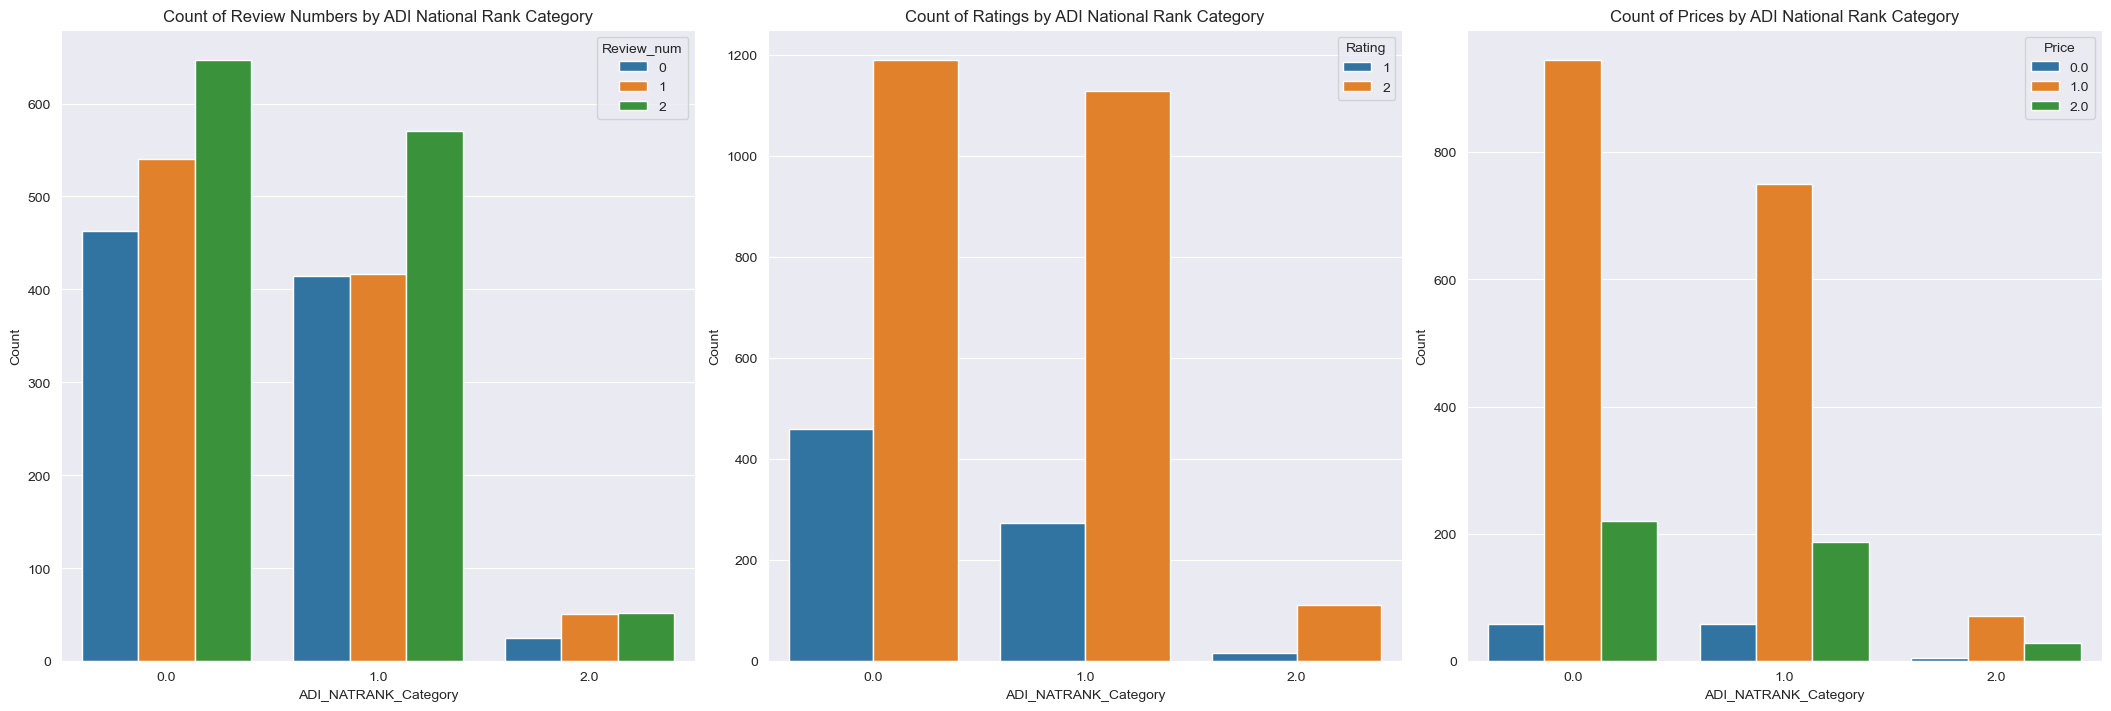

In [3]:
# Group the data by 'ADI_NATRANK_Category' and get the counts for each 'Review_num', 'Rating', and 'Price'
review_num_counts = df.groupby('ADI_NATRANK_Category')['Review_num'].value_counts().rename('count').reset_index()
rating_counts = df.groupby('ADI_NATRANK_Category')['Rating'].value_counts().rename('count').reset_index()
price_counts = df.groupby('ADI_NATRANK_Category')['Price'].value_counts().rename('count').reset_index()

# Function to create bar plots
def create_bar_plot(data, x, y, hue, title, ax):
    sns.barplot(x=x, y=y, hue=hue, data=data, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('ADI_NATRANK_Category')
    ax.set_ylabel('Count')

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(21, 7), constrained_layout=True)  # Change from 3, 1 to 1, 3 and adjust figsize

# Create a bar plot for 'Review_num' within each 'ADI_NATRANK_Category'
create_bar_plot(review_num_counts, 'ADI_NATRANK_Category', 'count', 'Review_num', 'Count of Review Numbers by ADI National Rank Category', axes[0])

# Create a bar plot for 'Rating' within each 'ADI_NATRANK_Category'
create_bar_plot(rating_counts, 'ADI_NATRANK_Category', 'count', 'Rating', 'Count of Ratings by ADI National Rank Category', axes[1])

# Create a bar plot for 'Price' within each 'ADI_NATRANK_Category'
create_bar_plot(price_counts, 'ADI_NATRANK_Category', 'count', 'Price', 'Count of Prices by ADI National Rank Category', axes[2])

plt.show()

**Construct a heatmap displaying the correlation matrix for Review_num, Rating, and Price.**

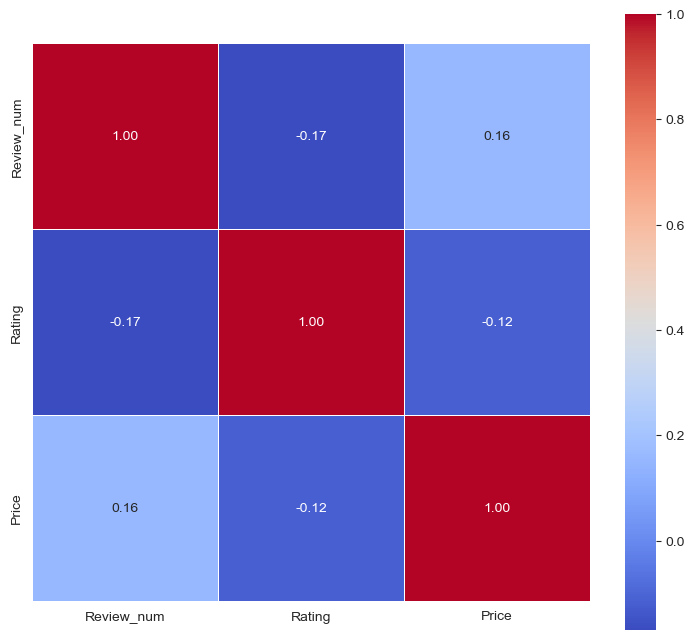

In [4]:
# Calculate correlations between numeric features
correlation_matrix = df[['Review_num', 'Rating', 'Price']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(9, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Show the plot
plt.show()


**Creating a Word Cloud by Classifying ADI_NATRANK Categories**

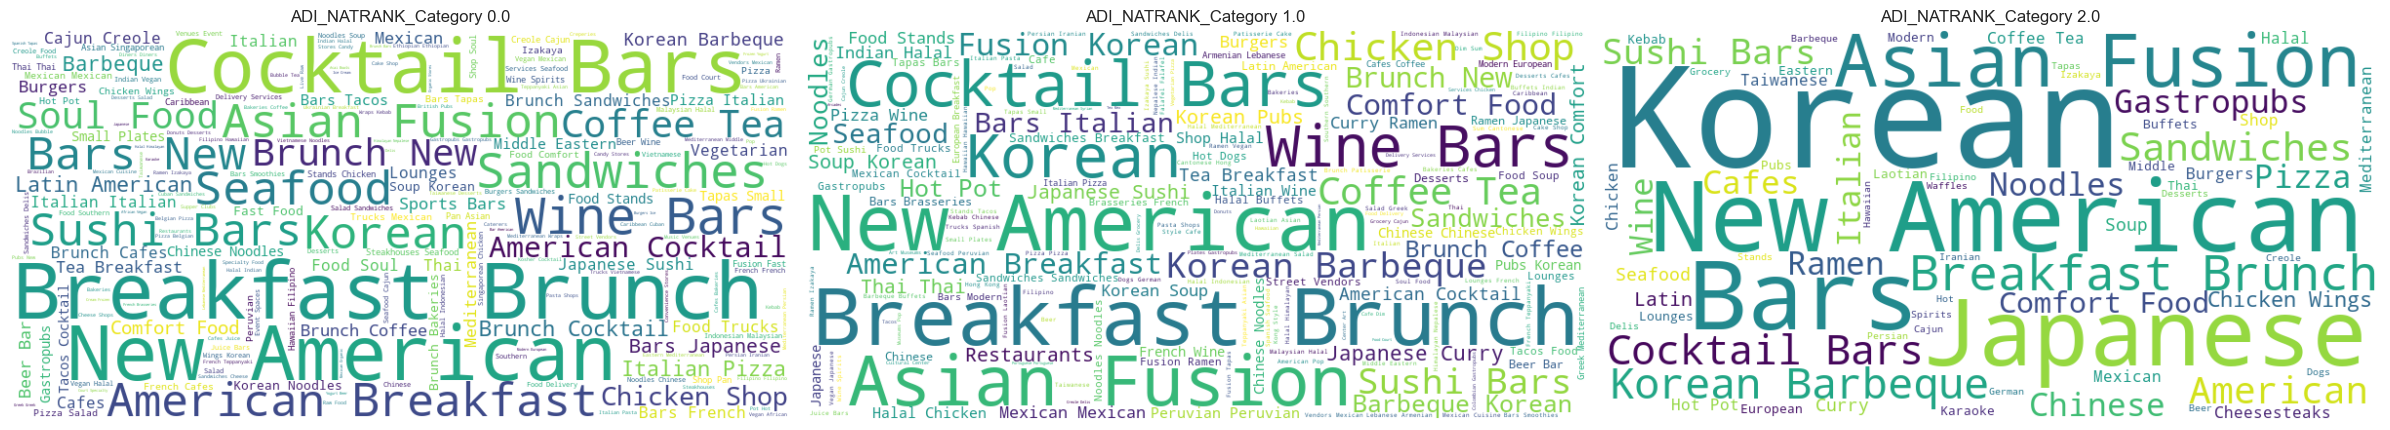

In [5]:
# Function to generate word clouds for each category
def generate_wordclouds(df, category_col, text_col):
    categories = df[category_col].unique()
    wordclouds = {}
    for cat in categories:
        # Combine text from the same category
        text = ' '.join(df[df[category_col] == cat][text_col].dropna().values)
        if text:  # Check if text is not empty
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
            wordclouds[cat] = wordcloud
    return wordclouds

# Generate word clouds for each ADI_NATRANK_Category in the 'Categories' column
wordclouds_by_adi_category = generate_wordclouds(df, 'ADI_NATRANK_Category', 'Categories')

# Number of categories
num_categories = len(wordclouds_by_adi_category)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=num_categories, figsize=(num_categories*8, 8))  # Adjust subplot to 1 row and as many columns as there are categories

# If there is only one category, axes will not be an array, so we need to check and wrap it in a list if necessary
if not isinstance(axes, np.ndarray):
    axes = [axes]

# Display the word clouds side by side
for ax, (cat, wordcloud) in zip(axes, wordclouds_by_adi_category.items()):
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'ADI_NATRANK_Category {cat}')
    ax.axis('off')

plt.tight_layout()
plt.show()


**Categorized Heatmaps**

In [6]:
# Handle missing data by filling NaNs with the median
#df['Price'].fillna(df['Price'].median(), inplace=True)
#df['ADI_NATRANK_Category'].fillna(df['ADI_NATRANK_Category'].median(), inplace=True)

# Define a function to create heatmaps based on the ADI_NATRANK_Category
def create_categorized_heatmap(data, lat_col, lon_col, value_col, category_col, title):
    # Create a folium map object
    m = folium.Map(location=[data[lat_col].mean(), data[lon_col].mean()], zoom_start=11)

    # Unique categories
    categories = data[category_col].unique()

    # Create a heatmap layer for each category
    for cat in categories:
        # Ensure there are no NaN values in the category data
        cat_data = data[data[category_col] == cat].dropna(subset=[value_col])
        heat_data = [[row[lat_col], row[lon_col], row[value_col]] for index, row in cat_data.iterrows()]
        HeatMap(heat_data, radius=10, max_zoom=13, name=f'Category {cat}').add_to(m)

    # Add LayerControl to allow layers to be turned on and off
    folium.LayerControl().add_to(m)

    # Add title
    title_html = f'''
     <h3 align="center" style="font-size:20px"><b>{title}</b></h3>
     '''
    m.get_root().html.add_child(folium.Element(title_html))

    return m

# Create categorized heatmaps for each column of interest
map_review_num_by_adi = create_categorized_heatmap(df, 'latitude', 'longitude', 'Review_num', 'ADI_NATRANK_Category', 'Categorized Heatmap of Review Numbers')
map_rating_by_adi = create_categorized_heatmap(df, 'latitude', 'longitude', 'Rating', 'ADI_NATRANK_Category', 'Categorized Heatmap of Ratings')
map_price_by_adi = create_categorized_heatmap(df, 'latitude', 'longitude', 'Price', 'ADI_NATRANK_Category', 'Categorized Heatmap of Prices')

In [7]:
map_review_num_by_adi

In [10]:
map_rating_by_adi

In [9]:
map_price_by_adi